In [82]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process.kernels import RBF

import plot_params
plt.rcParams.update(plot_params.fig_opt_bounds_ex) 

from models import Optimal_Bounds, Noisy_Bounds, Interpolant, Kernel_Ridge_Regressor

Text(-1.5, 1.8, '$f^\\star(x)$')

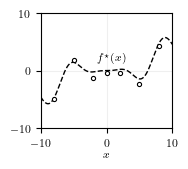

In [108]:
np.random.seed(1) 
k = RBF(length_scale=2.5)

xmin, xmax = -10., 10
xx = np.linspace(xmin, xmax, 200).reshape(-1, 1) 

n_centers = 15
centers = np.linspace(xmin*0.6, xmax*0.6, n_centers).reshape(-1, 1)
values = 0.06*(np.square(centers) * np.sin(centers))

s = Interpolant(k, centers, values, jitter=1e-10)
gamma = s.norm() * 1.1

X = np.array([-8, -5, -2, 0, 2, 5, 8]).reshape(-1,1)
fX = s(X)

delta_bar = 1 
delta = np.random.uniform(-delta_bar, delta_bar, fX.shape)
#delta = 2*np.array([-1., 1., -1., 1., -1., -1., 1.]).reshape(-1,1)
Y = fX + delta

fig = plt.figure()
plt.xlabel('$x$')
fig.axes[0].yaxis.set_label_coords(-0.18, .5)
fig.axes[0].xaxis.set_label_coords(0.5, -0.18)
plt.xticks([-10, 0, 10])
plt.yticks([-10, 0, 10])
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.plot(xx, s(xx), "k--")
plt.plot(X, Y, "o")
plt.text(-1.5, 1.8,"$f^\star(x)$")


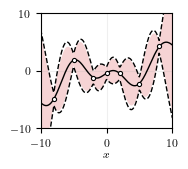

In [109]:
krr = Kernel_Ridge_Regressor(k, X, Y, lam=1e-3, jitter=1e-8)
bounds = Optimal_Bounds(X, Y, k, gamma, delta_bar)
cf_bounds = Noisy_Bounds(X, Y, k, gamma, delta_bar)

fig = plt.figure()#plt.figure(figsize=(6, 4), dpi=100)
plt.xlabel('$x$')
#plt.ylabel('$f(x)$')
fig.axes[0].yaxis.set_label_coords(-0.18, .5)
fig.axes[0].xaxis.set_label_coords(0.5, -0.18)
plt.xticks([-10, 0, 10])
plt.yticks([-10, 0, 10])
plt.xlim(-10,10)
plt.ylim(-10,10)


plt.plot(xx.reshape(-1,), cf_bounds(xx, krr, "upper").reshape(-1,), 'k--')
plt.plot(xx.reshape(-1,), cf_bounds(xx, krr, "lower").reshape(-1,), 'k--')
plt.fill_between(xx.reshape(-1,), 
                  bounds(xx, "upper").reshape(-1,), 
                  bounds(xx, "lower").reshape(-1,), 
                  facecolor=plot_params.colors["red"], alpha=0.2)

plt.plot(xx, krr(xx), color='k')
#plt.plot(xx, s(xx), color=plot_params.colors["red"])
plt.plot(X, Y, 'o')

filename = 'chap2_ex4_cf_bounds_A'
plt.savefig("".join([plot_params.path_to_img_folder, filename, ".pdf"]), bbox_inches='tight', pad_inches = 0.02)

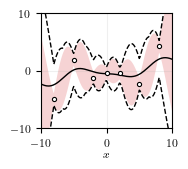

In [114]:
krr = Kernel_Ridge_Regressor(k, X, Y, lam=1e-1, jitter=1e-8)
bounds = Optimal_Bounds(X, Y, k, gamma, delta_bar)
cf_bounds = Noisy_Bounds(X, Y, k, gamma, delta_bar)

fig = plt.figure()#plt.figure(figsize=(6, 4), dpi=100)
plt.xlabel('$x$')
#plt.ylabel('$f(x)$')
fig.axes[0].yaxis.set_label_coords(-0.18, .5)
fig.axes[0].xaxis.set_label_coords(0.5, -0.18)
plt.xticks([-10, 0, 10])
plt.yticks([-10, 0, 10])
plt.xlim(-10,10)
plt.ylim(-10,10)


plt.plot(xx.reshape(-1,), cf_bounds(xx, krr, "upper").reshape(-1,), 'k--')
plt.plot(xx.reshape(-1,), cf_bounds(xx, krr, "lower").reshape(-1,), 'k--')
plt.fill_between(xx.reshape(-1,), 
                  bounds(xx, "upper").reshape(-1,), 
                  bounds(xx, "lower").reshape(-1,), 
                  facecolor=plot_params.colors["red"], alpha=0.2)

plt.plot(xx, krr(xx), color='k')
#plt.plot(xx, s(xx), color=plot_params.colors["red"])
plt.plot(X, Y, 'o')

filename = 'chap2_ex4_cf_bounds_B'
plt.savefig("".join([plot_params.path_to_img_folder, filename, ".pdf"]), bbox_inches='tight', pad_inches = 0.02)

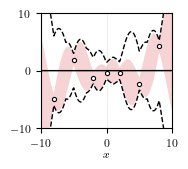

In [111]:
krr = Kernel_Ridge_Regressor(k, X, Y, lam=1e2, jitter=1e-8)
bounds = Optimal_Bounds(X, Y, k, gamma, delta_bar)
cf_bounds = Noisy_Bounds(X, Y, k, gamma, delta_bar)

fig = plt.figure()#plt.figure(figsize=(6, 4), dpi=100)
plt.xlabel('$x$')
#plt.ylabel('$f(x)$')
fig.axes[0].yaxis.set_label_coords(-0.18, .5)
fig.axes[0].xaxis.set_label_coords(0.5, -0.18)
plt.xticks([-10, 0, 10])
plt.yticks([-10, 0, 10])
plt.xlim(-10,10)
plt.ylim(-10,10)


plt.plot(xx.reshape(-1,), cf_bounds(xx, krr, "upper").reshape(-1,), 'k--')
plt.plot(xx.reshape(-1,), cf_bounds(xx, krr, "lower").reshape(-1,), 'k--')
plt.fill_between(xx.reshape(-1,), 
                  bounds(xx, "upper").reshape(-1,), 
                  bounds(xx, "lower").reshape(-1,), 
                  facecolor=plot_params.colors["red"], alpha=0.2)

plt.plot(xx, krr(xx), color='k')
#plt.plot(xx, s(xx), color=plot_params.colors["red"])
plt.plot(X, Y, 'o')

filename = 'chap2_ex4_cf_bounds_C'
plt.savefig("".join([plot_params.path_to_img_folder, filename, ".pdf"]), bbox_inches='tight', pad_inches = 0.02)

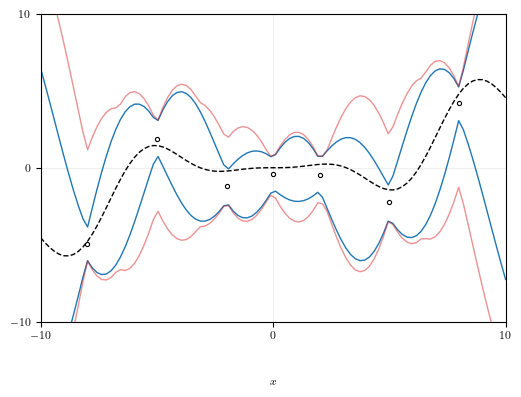

In [ ]:
krr = Kernel_Ridge_Regressor(k, X, Y, lam=1e-1, jitter=1e-8)
cf_bounds = Noisy_Bounds(X, Y, k, gamma*1.1, delta_bar)

fig = plt.figure(figsize=(6, 4), dpi=100)
plt.xlabel('$x$')
#plt.ylabel('$f(x)$')
fig.axes[0].yaxis.set_label_coords(-0.18, .5)
fig.axes[0].xaxis.set_label_coords(0.5, -0.18)
plt.xticks([-10, 0, 10])
plt.yticks([-10, 0, 10])
plt.xlim(-10,10)
plt.ylim(-10,10)

# plt.fill_between(xx.reshape(-1,), ub.reshape(-1,), lb.reshape(-1,), 
#                  facecolor="w", 
#                  edgecolor=plot_params.colors["blue"], alpha=1)
plt.plot(xx.reshape(-1,), ub.reshape(-1,), color=plot_params.colors["blue"], alpha=1)
plt.plot(xx.reshape(-1,), lb.reshape(-1,), color=plot_params.colors["blue"], alpha=1)

plt.plot(X, Y, 'o')
plt.plot(xx, s(xx), "k--")
#plt.plot(xx, krr(xx), "--", color=plot_params.colors["red"])

# plt.fill_between(xx.reshape(-1,), 
#                  cf_bounds(xx, krr, "upper").reshape(-1,), 
#                  cf_bounds(xx, krr, "lower").reshape(-1,), 
#                  facecolor="w",
#                  edgecolor=plot_params.colors["red"], alpha=1)
plt.plot(xx.reshape(-1,), cf_bounds(xx, krr, "upper").reshape(-1,), color=plot_params.colors["red"], alpha=0.5)
plt.plot(xx.reshape(-1,), cf_bounds(xx, krr, "lower").reshape(-1,), color=plot_params.colors["red"], alpha=0.5)
